1. Develop yourself using numpy library: 
a) a function to implement gradient descent (GD) algorithm 
b) Adam's optimization algorithm 
for a function of two variables f(x,y).
2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).
3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.


In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Part 1

## a) GD algorithm

In [20]:
# This module will help us to represent the function in semi-text form
from sympy import Symbol, lambdify

In [21]:
def partial_dz(func, x_0, y_0, name):
    '''
    This function returns a partial derivative in a given point (2-dimensional case).
    
    Parameters
    --------
    func : function
        The function f(x, y)
    x_0, y_0: floats
        a point at which the derivative is taken
    name: string ('x'|'y')
        the name of the variable over which the partial derivative is taken

    Returns the numerical value of the partial derivative at a point.
    '''
    if name == 'x':
        x = Symbol('x')
        y = Symbol('y')
        dzdx = func(x,y_0).diff(x)
        dzdx = lambdify(x, dzdx, 'numpy')
        return dzdx(x_0)
    elif name == 'y':
        x = Symbol('x')
        y = Symbol('y')
        dzdy = func(x_0, y).diff(y)
        dzdy = lambdify(y, dzdy, 'numpy')
        return dzdy(y_0)

In [5]:
# gradient vector [df/dx, df/dy]
def grad_vector(func, x_0, y_0):
    return np.array([partial_dz(func, x_0, y_0, 'x'), partial_dz(func, x_0 , y_0, 'y')])

In [9]:
# The GD algorithm function
def grad_descent(func, x_prev, learn_rate):
    '''
    The GD algorithm function
    Params
    ------
    func: function
       The function f(x, y)
    x_prev : array
       The starting point for the first descent
    learn_rate : float
        Step size of gradient descent

    Returns
    -------
    x_next: array
      The point where the f(x,y) reaches its minimum
    func(x_next[0], x_next[1]): float
      The function minimum value
    grad_itter: integer
      Number of gradient descent iterations
    seq_x, seq_y: arrays
      Intermediate points 
    '''
    
    epsilon = 0.0001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = x_prev - learn_rate*grad_vector(func, x_prev[0],x_prev[1])
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(func, x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, func(x_next[0], x_next[1]), grad_itter, seq_x,seq_y)

In [ ]:
# Stochastic gradient descent

def grad_descent(func, x_prev, learn_rate):
    '''
    The GD algorithm function
    Params
    ------
    func: function
       The function f(x, y)
    x_prev : array
       The starting point for the first descent
    learn_rate : float
        Step size of gradient descent

    Returns
    -------
    x_next: array
      The point where the f(x,y) reaches its minimum
    func(x_next[0], x_next[1]): float
      The function minimum value
    grad_itter: integer
      Number of gradient descent iterations
    seq_x, seq_y: arrays
      Intermediate points 
    '''
    
    epsilon = 0.0001
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = x_prev - learn_rate*grad_vector(func, x_prev[0],x_prev[1])
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        
        x_prev = x_next
        x_next = x_prev - learn_rate*grad_vector(func, x_prev[0],x_prev[1])
        grad_itter += 1
        
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, func(x_next[0], x_next[1]), grad_itter, seq_x,seq_y)

## b) Adam's optimization algorithm

In [28]:
def adam(func, x_prev, learn_rate=0.001, betta1=0.9, betta2=0.999, delta=10**(-8)):

    '''
    The GD algorithm function
    Params
    ------
    func: function
       The function f(x, y)
    x_prev : array
       The starting point for the first iteration
    learn_rate : float
        Step size
    betta1, betta2, delta: floats
        Special Adam algorithm parameters

    Returns
    -------
    x_next: array
      The point where the f(x,y) reaches its minimum
    func(x_next[0], x_next[1]): float
      The function minimum value
    grad_itter: integer
      Number of gradient descent iterations
    seq_x, seq_y: arrays
      Intermediate points 
    '''

    #1st and 2nd momemt variables
    s = np.array([0, 0]) 
    r = np.array([0, 0]) 

    epsilon = 0.0001
    t = 1

    seq_x = []
    seq_y = []

    # Compute gradient
    grad = grad_vector(func, x_prev[0],x_prev[1])
    # Update biased first moment estimate
    s = betta1 * s + (1 - betta1) * grad
    # Update biased second moment estimate
    r = betta2 * r + (1 - betta2) * np.power(grad, 2)
    # Correct bias in first momemt
    s_corr = s/(1 - betta1**t)
    # Correct bias in second moment
    r_corr = r/(1 - betta2**t)
    # Compute and apply update
    x_next = x_prev - learn_rate*s_corr/(r_corr**0.5 + delta)

    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])


    while np.linalg.norm(np.subtract(x_next,x_prev)) > epsilon:
        grad = grad_vector(func, x_prev[0],x_prev[1])
        t+=1
        s = betta1 * s + (1 - betta1) * grad
        r = betta2 * r + (1 - betta2) * np.power(grad, 2)
        s_corr = s/(1 - betta1**t)
        r_corr = r/(1 - betta2**t)
        x_prev = x_next
        x_next = x_prev - learn_rate*s_corr/(np.sqrt(r_corr) + delta)

        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])

    return (x_next, func(x_next[0], x_next[1]), t, seq_x,seq_y)

# Part 2

In [10]:
# Coming up with an arbitrary function
func = lambda x, y: x**4 + 2*y**2 + 1

## Searching for the minimum with gradient descent

In [40]:
min_point, fmin, num_iters, seq_x, seq_y = grad_descent(func, [1, 1], 0.3)

print('Minimum (x,y) from gradient descent: %s' %min_point)
print('Fmin = ', fmin)
print('Number of iterations: ', num_iters)

Minimum (x,y) from gradient descent: [-4.35457827e-002  4.11376139e-146]
Fmin =  1.0000035957078948
Number of iterations:  208


## Searching for the minimum with Adam's optimization

In [44]:
min_point_A, fmin_A, num_iters_A, seq_x_A, seq_y_A = adam(func, [1, 1], 0.05)

print('Minimum (x,y) from gradient descent: %s' %min_point_A)
print('Fmin = ', fmin_A)
print('Number of iterations: ', num_iters_A)

Minimum (x,y) from gradient descent: [ 0.03373084 -0.01353151]
Fmin =  1.0003674979987918
Number of iterations:  93


# Part 3

## GD

Text(0.5, 0, 'N')

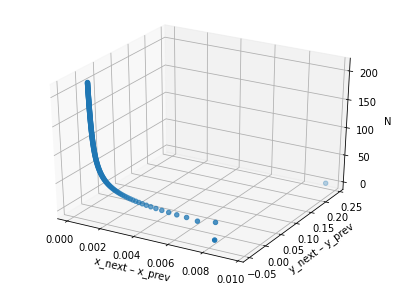

In [12]:
fig = plt.figure(1, figsize = (15, 5))
# Number of iterations
N = np.arange(1, num_iters, 1)
# Array of x coordinates difference per every iteration
x = np.array([(seq_x[i+1] - seq_x[i]) for i in range(num_iters - 1)]) 
# Array of y coordinates difference per every iteration
y = np.array([(seq_y[i+1] - seq_y[i]) for i in range(num_iters - 1)])

ax = fig.add_subplot(122, projection='3d')
# Building a scatterplot to show the dependence: the bigger N - the smaller the gradients descent
ax.scatter(x, y, N)
ax.set_xlabel("x_next – x_prev")
ax.set_ylabel("y_next – y_prev")
ax.set_zlabel('N')


In [17]:
# Making an array of all points
points = np.array([(x, y) for x, y in zip(seq_x, seq_y)])

# Making an array od euclidean distances
dists = np.array([np.linalg.norm(np.subtract(points[i], points[i-1])) for i in range(1, len(points))])

Text(0, 0.5, 'x_next – x_prev')

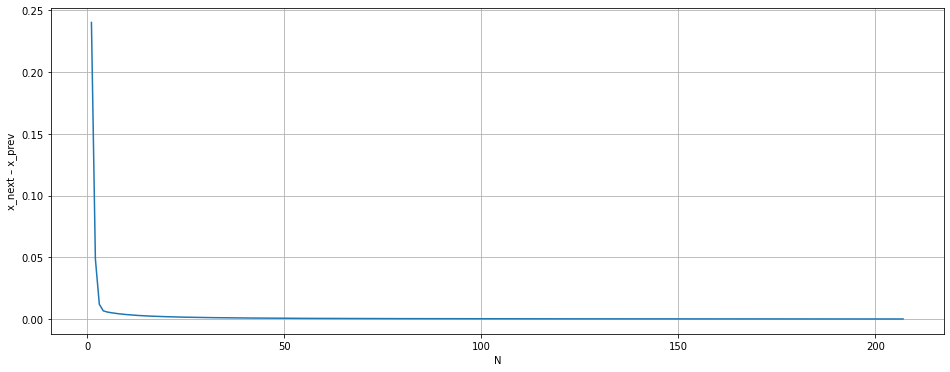

In [18]:
# Making an array od euclidean distances
fig = plt.figure(figsize = (16, 6))
ax = plt.plot(N, dists)
plt.grid()
plt.xlabel("N")
plt.ylabel("x_next – x_prev")

## Adam

In [45]:
# Making an array of all points
points = np.array([(x, y) for x, y in zip(seq_x_A, seq_y_A)])

# Making an array od euclidean distances
dists = np.array([np.linalg.norm(np.subtract(points[i], points[i-1])) for i in range(1, len(points))])

Text(0, 0.5, 'x_next – x_prev')

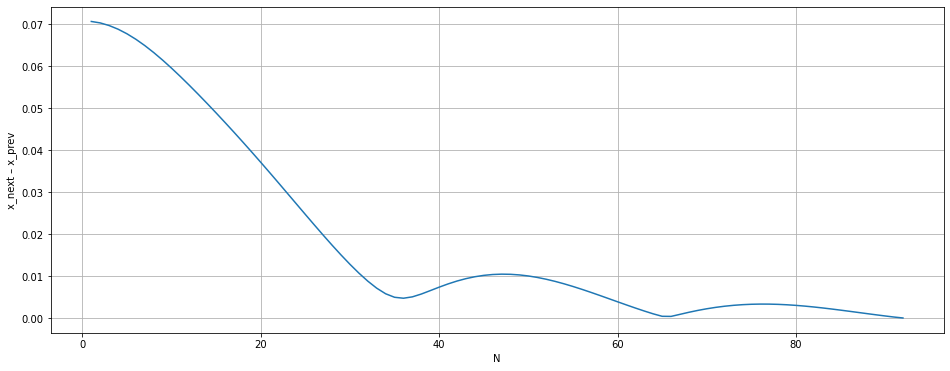

In [46]:
# Making an array od euclidean distances
fig = plt.figure(figsize = (16, 6))

N = np.arange(1, num_iters_A, 1)
ax = plt.plot(N, dists)
plt.grid()
plt.xlabel("N")
plt.ylabel("x_next – x_prev")